<a href="https://colab.research.google.com/github/rohanroney/Play-Store-App-Review-Analysis/blob/main/Rohan_Roney_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [121]:
# Import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Creating dataframes for both playstore data as well as user reviews data

In [3]:
# Reading the data from the csv files
working_directory = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project 1-Play Store App Review Analysis/dat/'
play_store_df = pd.read_csv(working_directory + 'Play Store Data.csv')
user_reviews_df = pd.read_csv(working_directory + 'User Reviews.csv')

###Understanding the Play Store data

In [4]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
len(list(play_store_df['App'].unique()))

9660

### Remove duplicates

In [11]:
play_store = play_store_df.copy()

In [12]:
play_store.drop_duplicates(subset ="App", keep = 'last', inplace = True) 

In [13]:
play_store.shape

(9660, 13)

In [15]:
play_store['Rating'].median()

4.3

In [17]:
# Replace NaN values and the oulier values of Rating with the mean values
play_store['Rating'] = play_store['Rating'].fillna(play_store['Rating'].median())

In [18]:
play_store = play_store.drop(10472)

In [19]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [22]:
def convert_to_float(value):

  ''' Returns evaluated value
  return eval(value)


In [23]:
# Changing the Reviews column to float type
play_store['Reviews'] = play_store['Reviews'].apply(convert_to_float)


In [24]:
def convert_size_value(value):   (#Final)

  ''' Converting KB to MB and giving out the result'''

  if (value[-1]=='M'):
    val = value[0:-1]  
    return eval(val)

  elif (value[-1]=='k'):
    val = value[0:-1]
    return (eval(val))/1000

  else:
    return 0


In [25]:
# Formatting of Size data. (# Final)
play_store['Size'] = play_store['Size'].apply(convert_size_value)
play_store.loc[play_store['Size']==0,'Size'] = play_store.loc[play_store['Size']>0,'Size'].median() 


In [26]:
# Formatting of Installs data
play_store.Installs = play_store.Installs.apply(lambda x: x.strip('+'))
play_store.Installs = play_store.Installs.apply(lambda x: x.replace(',',''))


In [27]:
play_store['Installs'] = play_store['Installs'].apply(convert_to_float)


In [29]:
play_store.describe()

,Rating,Reviews,Size,Installs
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03
mean,4.192422,2.166512e+05,19.331161,7.794247e+06
std,0.496071,1.830738e+06,20.585379,5.376991e+07
min,1.000000,0.000000e+00,0.008500,0.000000e+00
25%,4.000000,2.500000e+01,5.300000,1.000000e+03
50%,4.300000,9.690000e+02,12.000000,1.000000e+05
75%,4.500000,2.940100e+04,25.000000,1.000000e+06
max,5.000000,7.812821e+07,100.000000,1.000000e+09


#### Cleaning the Type data

In [30]:
play_store.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [31]:
play_store[play_store.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,12.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [32]:
play_store.Type =play_store.Type.fillna('Free')

#### Cleaning the Price Data

In [34]:
play_store.Price = play_store.Price.apply(lambda x: x.strip('$'))

In [35]:
play_store['Price'] = play_store['Price'].apply(convert_to_float)


In [36]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [37]:
play_store.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.192422,2.166512e+05,19.331161,7.794247e+06,1.097231
std,0.496071,1.830738e+06,20.585379,5.376991e+07,16.851618
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,400.000000


### Information based on Category (# Final)

In [38]:
Category_df = play_store.groupby('Category').agg({'App':"count",'Rating': "mean",'Reviews':"sum",'Installs':"sum",'Size':"median","Price":"mean"}).sort_values(by=['Installs','Rating','Reviews','Size','App'],ascending = [False,False,False,False,False]).rename(columns ={'App':'Num_Apps','Rating':'Avg. Ratings','Reviews':'Total_reviews','Installs':'Total_installs','Size':'Avg_Size(MB)'})

In [39]:
Category_df

,Num_Apps,Avg. Ratings,Total_reviews,Total_installs,Avg_Size(MB),Price
Category,,,,,,
COMMUNICATION,316,4.154747,285824817,11039276251,12.00,0.263101
GAME,926,4.243305,425239248,10897924415,34.00,0.307030
FAMILY,1906,4.200367,345758056,8870642505,17.00,1.264344
TOOLS,829,4.074427,229433729,8102771915,5.20,0.322376
PRODUCTIVITY,374,4.206150,55570346,5788091369,11.00,0.670936
SOCIAL,239,4.255230,227802363,5487867902,11.00,0.066820
PHOTOGRAPHY,281,4.165125,105556805,4658147655,12.00,0.420925
VIDEO_PLAYERS,163,4.066871,67324804,3917002720,12.00,0.064172
TRAVEL_AND_LOCAL,219,4.103196,26817033,2894887146,13.00,0.228082


### Checking categorization based on free/paid apps

In [40]:
type_of_app_df = play_store.groupby('Type').agg({'App':"count",'Rating': "mean",'Reviews':"median",'Installs':"mean",'Size':"median"}).sort_values(by=['App','Rating','Reviews','Installs','Size'],ascending = [False,False,False,False,False]).rename(columns ={'App':'Num_Apps','Rating':'Avg. Ratings','Reviews':'Median_reviews','Installs':'Avg_installs','Size':'Avg_Size(MB)'})

In [41]:
type_of_app_df

,Num_Apps,Avg. Ratings,Median_reviews,Avg_installs,Avg_Size(MB)
Type,,,,,
Free,8905,4.185873,1369.0,8.447757e+06,12.0
Paid,754,4.269761,88.5,7.607929e+04,12.0


What type of apps are being used in the market? Which categories prefer what type of apps (paid/free)? What are some of the underutilized categories?

#### Distribution of app based on the Type

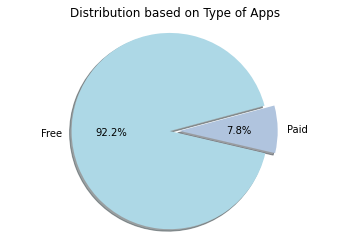

In [42]:
labels = 'Free','Paid'. (# Final)
my_colors = ['lightblue','lightsteelblue']
my_explode = (0,0.1)
plt.pie(type_of_app_df['Num_Apps'], labels=labels ,autopct='%1.1f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Distribution based on Type of Apps")
plt.axis('equal')
plt.show()

From this we can conclude that a majority of the apps in the market irrespective of the categories are free apps. 

### Understand Ratings Info based on Type using the categories

In [43]:
rating_based_on_type = play_store.groupby(['Category','Type'])[['Rating']].mean().reset_index().rename(columns={'Rating':'Avg_Rating','index':'Rating'})


In [44]:
rating_based_on_type

,Category,Type,Avg_Rating
0,ART_AND_DESIGN,Free,4.337931
1,ART_AND_DESIGN,Paid,4.733333
2,AUTO_AND_VEHICLES,Free,4.198780
3,AUTO_AND_VEHICLES,Paid,4.400000
4,BEAUTY,Free,4.283019
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,4.166667
59,VIDEO_PLAYERS,Free,4.066038
60,VIDEO_PLAYERS,Paid,4.100000
61,WEATHER,Free,4.235211


In [76]:
# Restructuring the data
df_rating_based_on_type = rating_based_on_type.pivot('Category', 'Type', 'Avg_Rating').fillna(0).reset_index()

In [77]:
df_rating_based_on_type.sort_values('Paid', ascending = False, ).head()

Type,Category,Free,Paid
21,NEWS_AND_MAGAZINES,4.151587,4.800000
8,EDUCATION,4.342000,4.800000
0,ART_AND_DESIGN,4.337931,4.733333
9,ENTERTAINMENT,4.098701,4.600000
26,SHOPPING,4.235500,4.500000


In [86]:
paid_rating = df_rating_based_on_type.set_index('Category').sort_values('Paid', ascending = False).head()

In [88]:
paid_rating

Type,Free,Paid
Category,,
NEWS_AND_MAGAZINES,4.151587,4.800000
EDUCATION,4.342000,4.800000
ART_AND_DESIGN,4.337931,4.733333
ENTERTAINMENT,4.098701,4.600000
SHOPPING,4.235500,4.500000


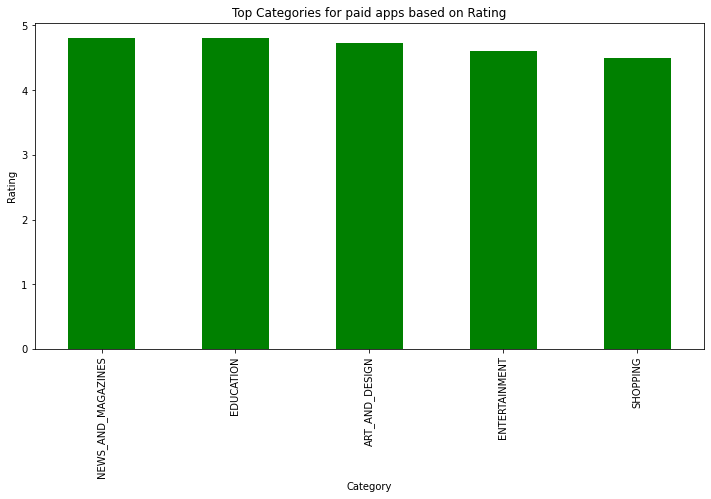

In [94]:
paid_rating['Paid'].plot( kind = 'bar', figsize=(12,6) , color = 'green')
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Top Categories for paid apps based on Rating")
plt.show()

In [78]:
df_rating_based_on_type.sort_values('Free', ascending = False).head()

Type,Category,Free,Paid
10,EVENTS,4.396825,4.300000
8,EDUCATION,4.342000,4.800000
3,BOOKS_AND_REFERENCE,4.340206,4.292857
0,ART_AND_DESIGN,4.337931,4.733333
22,PARENTING,4.332759,3.350000


In [92]:
free_rating = df_rating_based_on_type.set_index('Category').sort_values('Free', ascending = False).head()

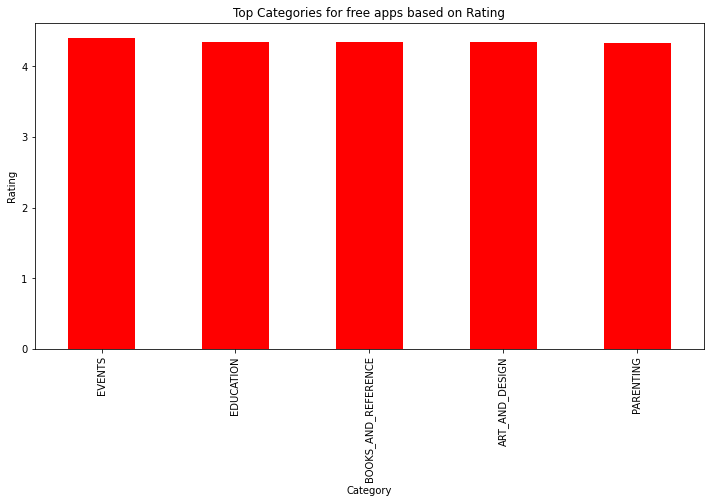

In [93]:
free_rating['Free'].plot( kind = 'bar', figsize=(12,6) , color = 'red')
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Top Categories for free apps based on Rating")
plt.show()


*  Based on the aforementioned data, we realise that for the "Free" apps, the categories of events, books & references, parenting  are the best ones. 

*   Amonst the paid ones, news & magazines, entertainment and shopping have the highest ratings.

* Education and Art & design are top performers in either categories.




 

#### Graph representing this information

In [47]:
df_rating_based_on_type_reshaped = df_rating_based_on_type.set_index('Category')

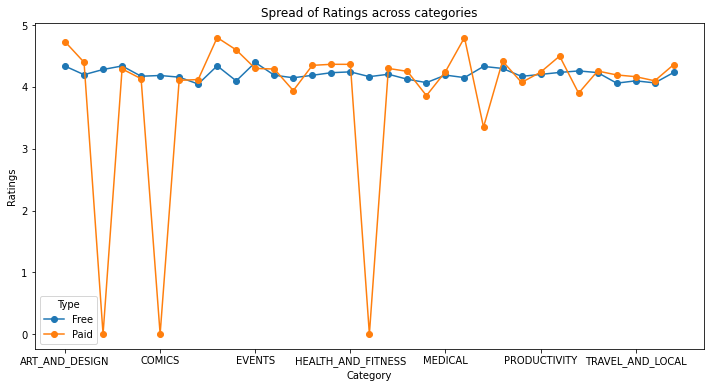

In [48]:
df_rating_based_on_type_reshaped.plot(figsize=(12,6) , marker = 'o')
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.title("Spread of Ratings across categories")
plt.show()

##### From this graph we can conclude that the ratings of the free apps have much lesser variance w.r.t the paid apps. This is relevant as we can conclude the authenticity of app reviews are more in case of paid apps as the user is really particular about what he buys and the service he gets for that.

### Understand count based on type of app

In [49]:
app_count_based_on_type = play_store.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})


In [50]:
app_count_based_on_type

,Category,Type,Count
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [51]:
# Restructuring the data
df_app_count_by_type = app_count_based_on_type.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


### Top 5 Categories with free apps

In [95]:
df_app_count_by_type.sort_values('Free',ascending = False ).head()

Type,Category,Free,Paid
11,FAMILY,1721.0,185.0
14,GAME,844.0,82.0
29,TOOLS,751.0,78.0
4,BUSINESS,407.0,12.0
18,LIFESTYLE,350.0,19.0


In [96]:
free_count = df_app_count_by_type.set_index('Category').sort_values('Free', ascending = False).head()

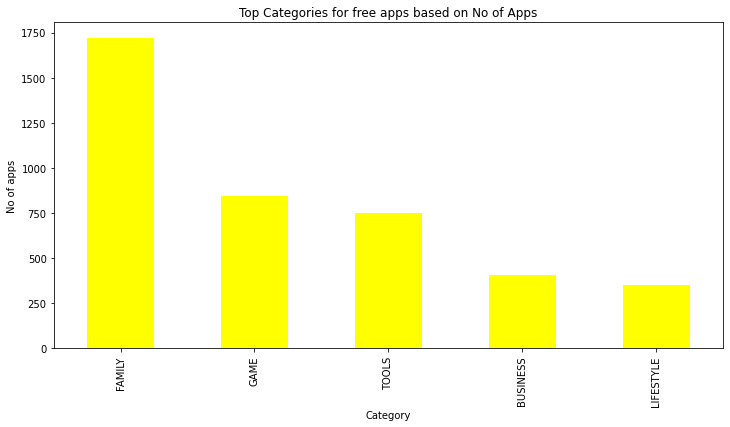

In [97]:
free_count['Free'].plot( kind = 'bar', figsize=(12,6) , color = 'yellow')
plt.xlabel("Category")
plt.ylabel("No of apps")
plt.title("Top Categories for free apps based on No of Apps")
plt.show()

### Top 5 Categories with paid apps

In [53]:
top_paid_apps_categories = df_app_count_by_type.sort_values('Paid',ascending = False )

In [54]:
top_paid_apps_categories.head(5)

Type,Category,Free,Paid
11,FAMILY,1721.0,185.0
20,MEDICAL,314.0,82.0
14,GAME,844.0,82.0
23,PERSONALIZATION,295.0,81.0
29,TOOLS,751.0,78.0


In [98]:
paid_count = top_paid_apps_categories.set_index('Category').head()

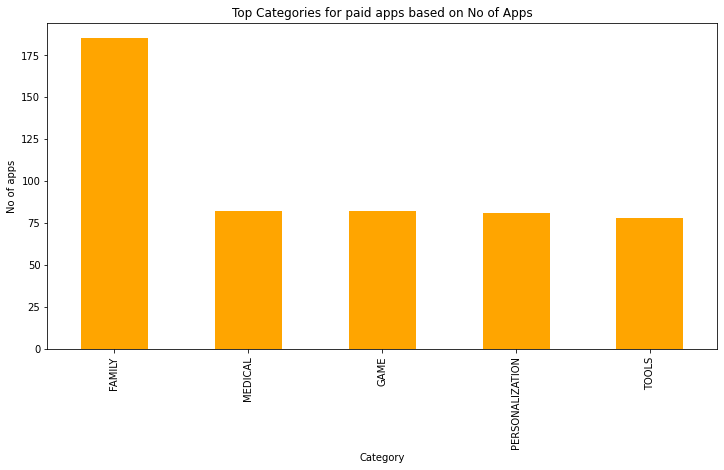

In [99]:
paid_count['Paid'].plot( kind = 'bar', figsize=(12,6) , color = 'orange')
plt.xlabel("Category")
plt.ylabel("No of apps")
plt.title("Top Categories for paid apps based on No of Apps")
plt.show()

In [55]:
categ_graph = top_paid_apps_categories.set_index('Category')


1.   So we can conclude that if we want to go for a free app, from the data of installations and data of the count we can say that, Family, Game and Tool categories are the most important.
2.   In case of paid apps,we notice that people go for paid apps majorly in niche sectors like Medical,Game, Personalization etc. Hence if investors want to go for this, they should have a target group in mind. 



### Visualization of the above info

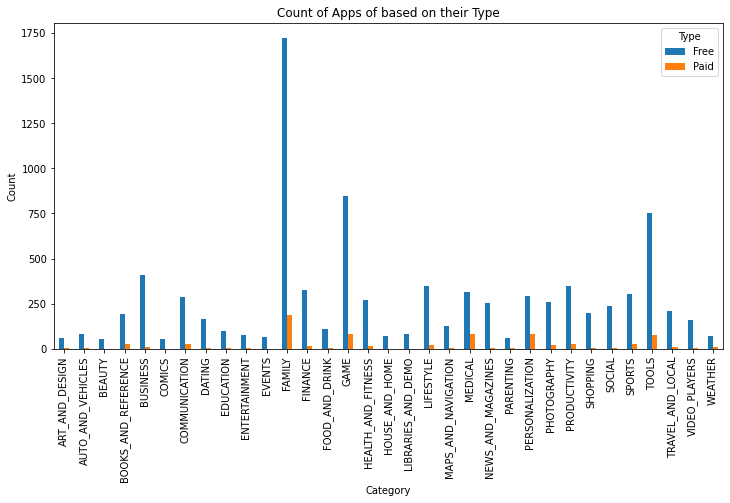

In [56]:
df_app_count_by_type.set_index('Category').plot(kind='bar', figsize=(12,6))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Apps of based on their Type")
plt.show()

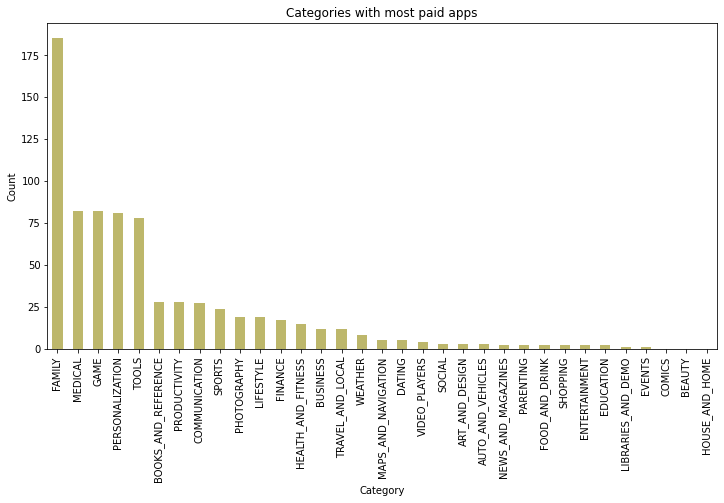

In [57]:
categ_graph['Paid'].plot(kind='bar', figsize=(12,6) , color = 'darkkhaki')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Categories with most paid apps")
plt.show()

### Understanding the Category wise pricing 

In [58]:
category_wise_pricing = play_store.groupby(['Category'])[['Price']].sum().reset_index().rename(columns={'index':'App'})


In [59]:
category_wise_pricing.sort_values('Price', ascending = False).head(5)

,Category,Price
12,FINANCE,2900.83
11,FAMILY,2409.84
18,LIFESTYLE,2360.87
20,MEDICAL,982.71
14,GAME,284.31


In [60]:
category_wise_pricing = category_wise_pricing.set_index('Category')

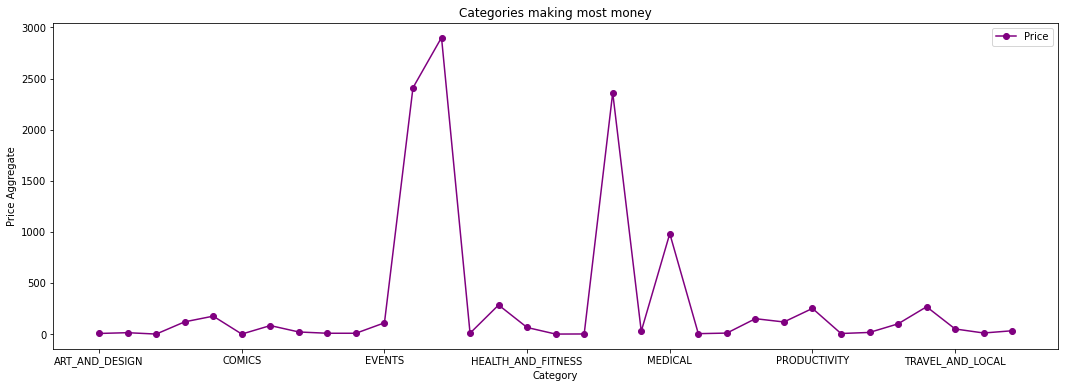

In [61]:
category_wise_pricing.plot(color = 'purple' ,marker = 'o', figsize=(18,6))
plt.xlabel("Category")
plt.ylabel("Price Aggregate")
plt.title("Categories making most money")
plt.show()

From the pricing data, we can conclude that the apps in the category of Finance, Family and Lifestyle make the most revenue.

#### Top 5 Apps based on Ratings

In [62]:
play_store[['App','Category','Rating']].sort_values(by=['Rating'], ascending = False).head(5)

,App,Category,Rating
7405,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0
7321,CG Jobs,FAMILY,5.0
9427,ei Calc,TOOLS,5.0
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0
7320,CG - Chemistry free,FAMILY,5.0


#### Top 5 Apps based on Reviews

In [63]:
play_store[['App','Category','Reviews']].sort_values(by=['Reviews'], ascending = False).head(5)

,App,Category,Reviews
3943,Facebook,SOCIAL,78128208
3904,WhatsApp Messenger,COMMUNICATION,69109672
3909,Instagram,SOCIAL,66509917
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847
3986,Clash of Clans,FAMILY,44881447


#### Top 5 Apps based on Installations Done

In [64]:
play_store[['App','Category','Installs']].sort_values(by=['Installs'], ascending = False).head(5)

,App,Category,Installs
4153,Hangouts,COMMUNICATION,1000000000
9844,Google News,NEWS_AND_MAGAZINES,1000000000
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
4234,Skype - free IM & video calls,COMMUNICATION,1000000000
3928,YouTube,VIDEO_PLAYERS,1000000000


## Doing some visualizations based on the Analysis

#### Plotting the count of apps based on categories





Text(0, 0.5, 'No of apps')

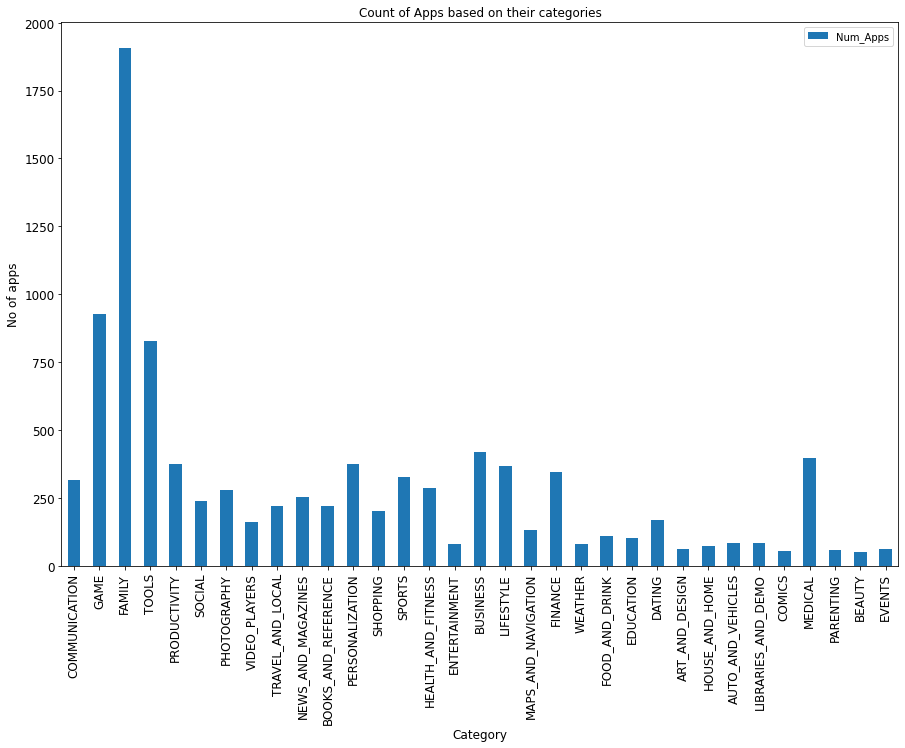

In [65]:
ax = Category_df['Num_Apps'].plot(kind='bar', title ="Count of Apps based on their categories", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("No of apps",fontsize=12)

#### Plotting the Apps based on installations in each categories


Text(0, 0.5, 'No of installations')

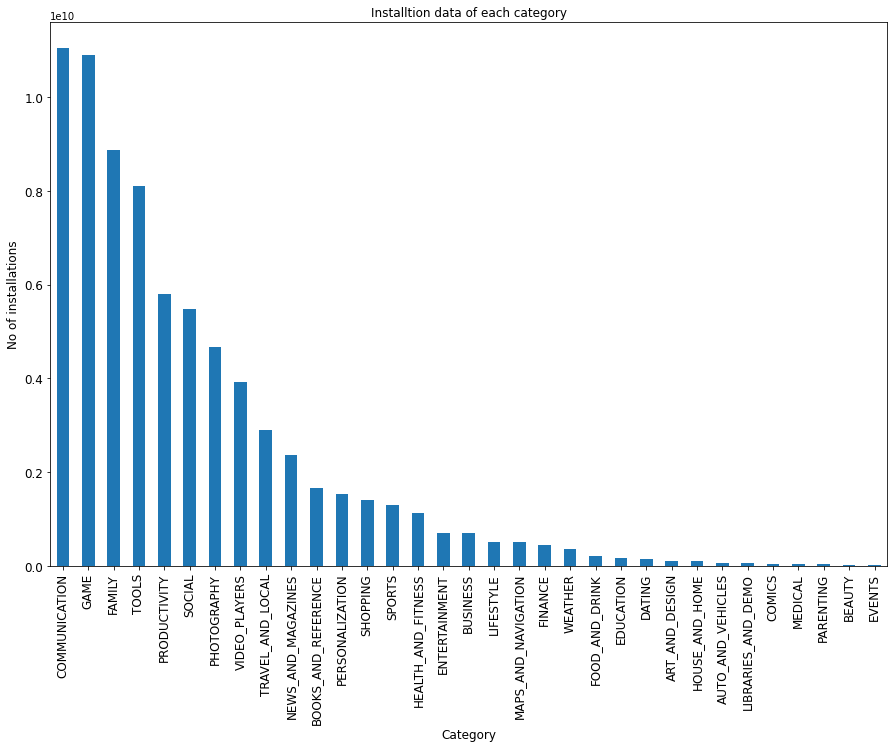

In [66]:
ax = Category_df['Total_installs'].plot(kind='bar', title ="Installtion data of each category", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("No of installations",fontsize=12)

Text(0, 0.5, 'Size')

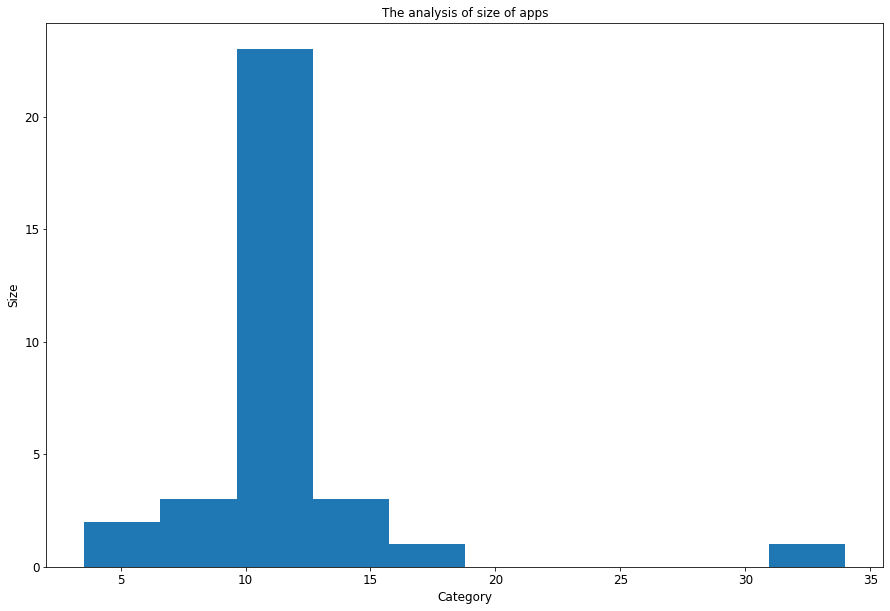

In [67]:
ax = Category_df['Avg_Size(MB)'].plot(kind='hist', title ="The analysis of size of apps", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Category",fontsize=12)
ax.set_ylabel("Size",fontsize=12)


## Understanding the User Reviews Data

In [68]:
# User Review  Data
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [69]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [70]:
user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [71]:
user_reviews_df.loc[0,'App']

'10 Best Foods for You'

In [72]:
user_reviews_df[user_reviews_df['App'] == '10 Best Foods for You']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
195,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
196,10 Best Foods for You,Love app. It gives way good idea I buying stor...,Positive,0.400000,0.400000
197,10 Best Foods for You,Great Its really best unique provides detailed...,Positive,0.579167,0.683333
198,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714


In [73]:
len(list(user_reviews_df['App'].unique()))

1074

In [103]:
# Using merge on the above df and the play_store df
merged_df_review_apps = play_store.merge(user_reviews_df, on="App")
merged_df_review_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,It's...a coloring book ap. And I like adult co...,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,wanted access pictures. I denied let app. Don'...,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Way many ads... im paying 8$USD pictures color...,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,"good bad color outside lines. like real, tradi...",Positive,2.775558e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,I really enjoying application. My complaint sm...,Negative,-3.472222e-02,0.581944


### Understand the distribution of sentiments (Positive, Negative, Neutral)

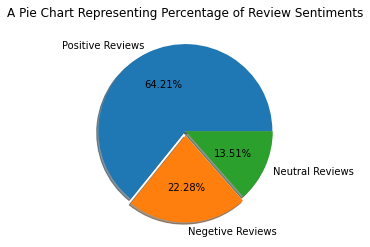

In [108]:
count_of_sentiments = list(merged_df_review_apps['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.pie(count_of_sentiments, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=12)
plt.axis('off')
plt.show()

#### We can conclude that most of the reviews i.e. close to 64.21% reviews are positive.

In [117]:
category_sentiment = merged_df_review_apps.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment = category_sentiment.pivot('Category', 'Sentiment', 'Sentiment Count').fillna(0).reset_index().set_index('Category')


In [118]:
category_sentiment.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,47,58,233
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


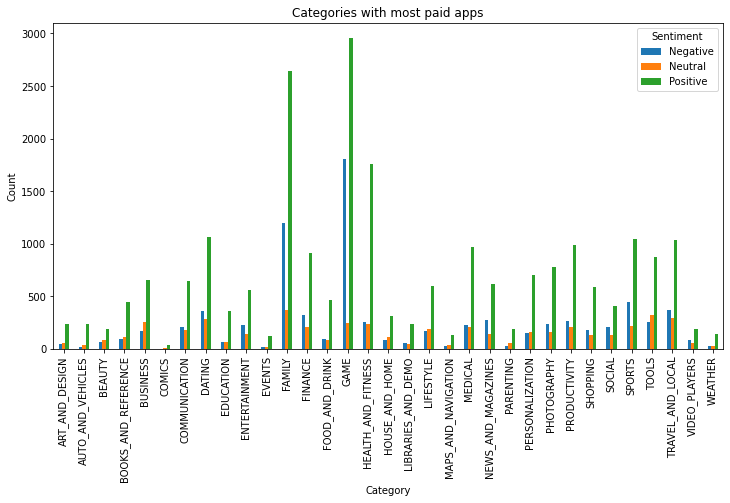

In [119]:
category_sentiment.plot(kind='bar', figsize=(12,6) )
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Categories with most paid apps")
plt.show()



*   We see that apps in the games and family sections are much more reviewed than other categories.
*   We also see that there is a general trend that people generally tend to give positve or negative reviews. Neutral reviews are much rarer.



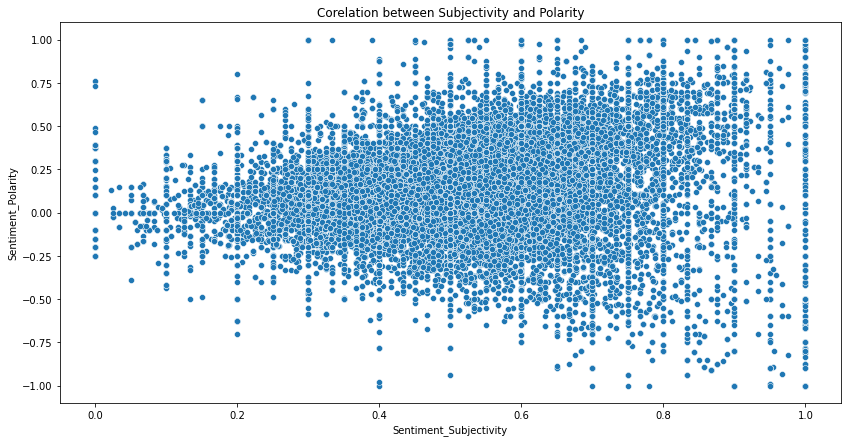

In [129]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=merged_df_review_apps['Sentiment_Subjectivity'], y=merged_df_review_apps['Sentiment_Polarity'])
plt.title("Corelation between Subjectivity and Polarity")
plt.show()

There is no clear correlation but in most cases if we see polarity and subjectivity there are certain values which are positively correlated